In [1]:
import openreview
import numpy as np
import pandas as pd
from tqdm import tqdm
import pickle

client = openreview.api.OpenReviewClient(baseurl='https://api2.openreview.net')

submissions = client.get_all_notes(invitation='ICLR.cc/2024/Conference/-/Submission', details='directReplies')

Getting V2 Notes: 100%|█████████▉| 7296/7304 [00:14<00:00, 511.95it/s]


In [2]:
reviews = []
for submission in submissions:
    reviews = reviews + [reply for reply in submission.details['directReplies']
                         if reply['invitations'][0].endswith('Official_Review')]


In [ ]:
reviews[0]

In [5]:
scores_dict = {}
for r in reviews:
    if r['forum'] not in scores_dict:
        scores_dict[r['forum']] = []
    scores_dict[r['forum']].append(int(r['content']['rating']['value'].split(':')[0]))

In [ ]:
scores_dict

In [36]:
score={}
for s in tqdm(submissions):
    if s.forum not in scores_dict:
        continue
    title = s.content['title']['value']
    if 'primary_area' in s.content:
        area = s.content['primary_area']['value']
    else:
        area = ''
    scores = scores_dict[s.forum]
    avg_score = np.mean(scores)
    std_score = np.std(scores)
    score[title.lower()]=[(avg_score), (std_score), ';'.join([str(i) for i in scores]), area]

100%|██████████| 7304/7304 [00:00<00:00, 22205.58it/s]


In [37]:
sorted_score={k:v for k,v in sorted(score.items(),key=lambda x :-x[1][0] )}
rank =1
for k,v in sorted_score.items():
    v.insert(0,rank)
    rank+=1


In [ ]:
sorted_score

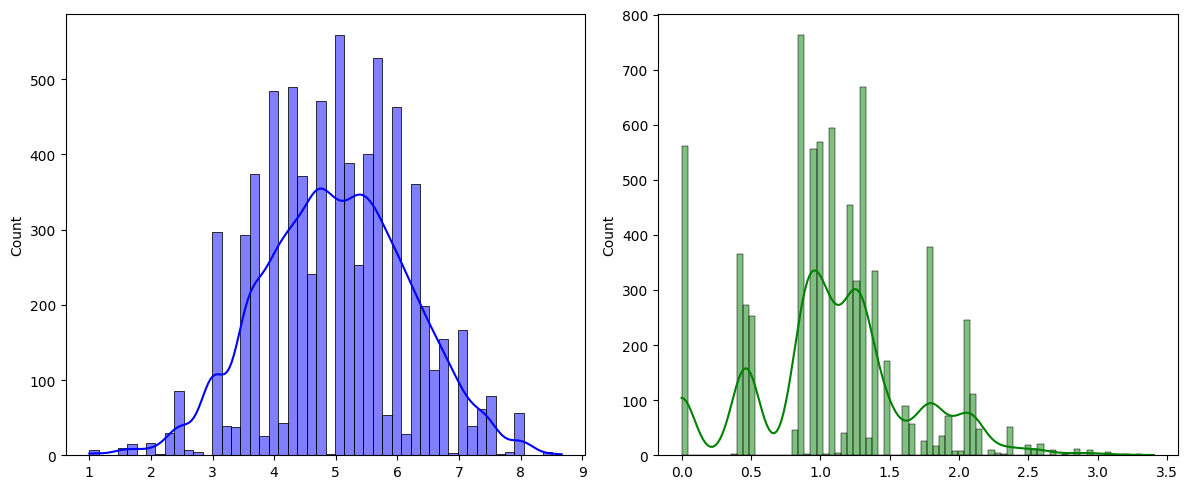

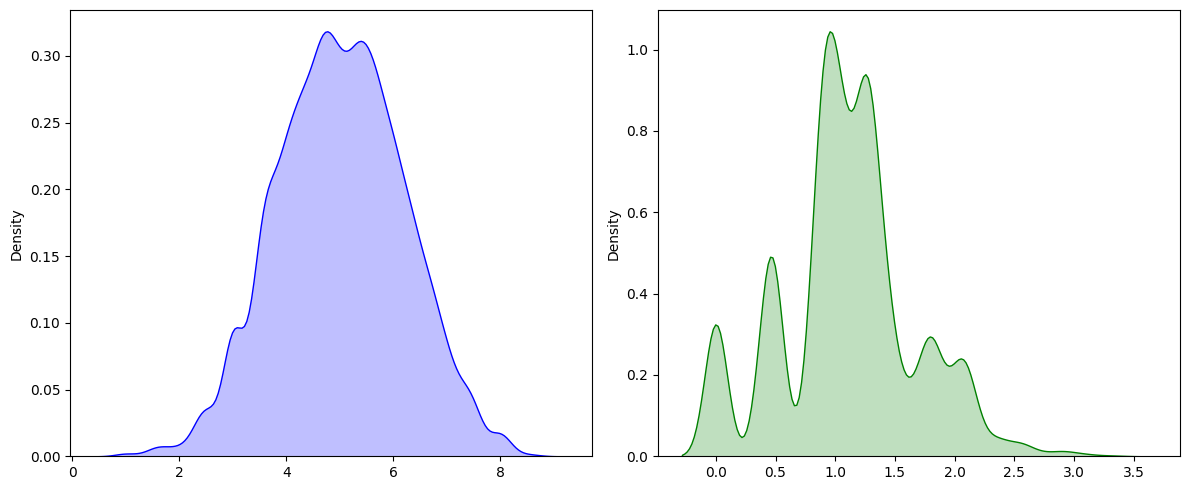

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
sdata,vdata=[],[]
for name, data in sorted_score.items():
    sdata.append(data[1])
    vdata.append(data[2])
fig, axs = plt.subplots(ncols=2, nrows=1,figsize=(12, 5))
sns.histplot(sdata,ax=axs[0],kde=True,color='blue')
sns.histplot(vdata,ax=axs[1],kde=True,color='green')
plt.tight_layout()

fig, axs = plt.subplots(ncols=2, nrows=1,figsize=(12, 5))
sns.kdeplot(sdata,ax=axs[0],color='blue',fill=True)
sns.kdeplot(vdata,ax=axs[1],color='green',fill=True)
plt.tight_layout()

In [41]:
with open('1123iclr2024.pkl','wb+') as f:
    pickle.dump(sorted_score,f)

In [2]:
with open('1123iclr2024.pkl','rb+') as f:
    _score=pickle.load(f)

NameError: name 'pickle' is not defined

In [1]:
for name ,param in score.items():
    if 'one-for-all' in name:
        print(name,param)

NameError: name 'score' is not defined

In [48]:
statistics = []
all_data = []
for s in tqdm(submissions):
    if s.forum not in scores_dict:
        continue
    title = s.content['title']['value']
    if 'primary_area' in s.content:
        area = s.content['primary_area']['value']
    else:
        area = ''
    scores = scores_dict[s.forum]
    avg_score = np.mean(scores)
    std_score = np.std(scores)
    all_data.append([ title, str(avg_score), str(std_score), ';'.join([str(i) for i in scores]), area])


df = pd.DataFrame(all_data, columns=['Title', 'Average Score', 'Standard Deviation', 'Individual Scores', 'Author-defined Area'])
df = df.sort_values(by=['Average Score'], ascending=False, ignore_index=True)
df.index = np.arange(1, len(df)+1)
df.to_csv('output.csv', index='True')

100%|██████████| 7304/7304 [00:00<00:00, 23445.87it/s]
